## This notebook is for the project retail analysis with Walmart Data by Jie
One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

In [1]:
# Import necessary Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

from matplotlib import dates
from datetime import datetime



In [2]:
# import data and check data 
import os
path=os.getcwd()
path
print(os.path.join(path, 'Data\Walmart_Store_sales.csv'))

C:\Users\jaoji\Python_training\Data\Walmart_Store_sales.csv


In [3]:
# read data
walmart=pd.read_csv(os.path.join(path, 'Data\Walmart_Store_sales.csv'))

In [27]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [28]:
walmart.describe

<bound method NDFrame.describe of       Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

     

In [31]:
walmart.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

##Dataset Description

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

Store - the store number

Date - the week of sales

Weekly_Sales -  sales for the given store

Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

Temperature - Temperature on the day of sale

Fuel_Price - Cost of fuel in the region

CPI – Prevailing consumer price index

Unemployment - Prevailing unemployment rate


## Analysis Tasks

Basic Statistics tasks

Which store has maximum sales

Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

Which store/s has good quarterly growth rate in Q3’2012

Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

Provide a monthly and semester view of sales in units and give insights

In [36]:
#1 Which store has maximum sales
# Sum Weekly_Sales for each store first
total_sales_store=walmart.groupby(['Store'])['Weekly_Sales'].sum()

In [47]:
print('The Store has maxium sales is store {}, total sales {}'.format(total_sales_store.idxmax(), int(total_sales_store.max())))


The Store has maxium sales is store 20, total sales 301397792


In [52]:
# Which store has maximum standard deviation
store_std = walmart.groupby(['Store'])['Weekly_Sales'].std()
print ('The store {} has the maxium standard deviation {} '.format(store_std.idxmax(),int(store_std.max())))

The store 14 has the maxium standard deviation 317569 


In [61]:
# Also find out the coefficient of mean to standard deviation
coeff=walmart.groupby(['Store'])['Weekly_Sales'].mean()/walmart.groupby(['Store'])['Weekly_Sales'].std()
coeff

Store
1      9.970873
2      8.102160
3      8.694034
4      7.868902
5      8.426840
6      7.362531
7      5.068303
8      8.550456
9      7.880502
10     6.284032
11     8.179167
12     7.250300
13     7.546394
14     6.363884
15     5.171059
16     6.053978
17     7.966815
18     6.140790
19     7.536924
20     7.639263
21     5.872253
22     6.378248
23     5.564175
24     8.088169
25     6.255458
26     9.081773
27     7.398888
28     7.281744
29     5.442400
30    19.227797
31    11.091264
32     8.452336
33    10.767931
34     9.239989
35     4.353863
36     6.150859
37    23.761933
38     9.019129
39     6.670767
40     8.101772
41     6.748681
42    11.069866
43    15.599741
44    12.225939
45     6.038183
Name: Weekly_Sales, dtype: float64

In [4]:
# 3 Which store/s has good quarterly growth rate in Q3’2012
walmart['Date']=pd.to_datetime(walmart['Date'],format='%d-%m-%Y')
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [66]:
walmart_Q22012=walmart[(walmart['Date']>='2012-04-01')& (walmart['Date']<='2012-06-30')]
walmart_Q2sale=walmart_Q22012.groupby('Store')['Weekly_Sales'].sum().reset_index(name='Qtr2_Sale')
walmart_Q2sale.describe
walmart_Q2sale.head()

,Store,Qtr2_Sale
0,1,20978760.12
1,2,25083604.88
2,3,5620316.49
3,4,28454363.67
4,5,4466363.69


In [67]:
walmart_Q32012=walmart[(walmart['Date']>='2012-07-01')& (walmart['Date']<='2012-09-30')]
walmart_Q3sale=walmart_Q32012.groupby('Store')['Weekly_Sales'].sum().reset_index(name='Qtr3_Sale')
walmart_Q3sale.head()

,Store,Qtr3_Sale
0,1,20253947.78
1,2,24303354.86
2,3,5298005.47
3,4,27796792.46
4,5,4163790.99


In [77]:
growth=pd.merge(walmart_Q2sale,walmart_Q3sale, on='Store')
growth["Growth_rt"]=(growth['Qtr3_Sale']-growth['Qtr2_Sale'])/growth['Qtr2_Sale']
print('The store has good growth rate is store {} with growth sales: {} '.format(growth['Growth_rt'].idxmax(),growth['Growth_rt'].max()))                   

The store has good growth rate is store 6 with growth sales: 0.13330776030738023 


#Some holidays have a negative impact on sales. 
#Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together
Holiday Events:

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [6]:
Super_Bowl =['2010-2-12', '2011-2-11', '2012-2-10','2013-2-8']
Labour_Day =  ['2010-9-10', '2011-9-9', '2012-9-7', '2013-9-6']
Thanksgiving =  ['2010-11-26', '2011-11-25', '2012-11-23','2013-11-29']
Christmas = ['2010-12-31', '2011-12-30', '2012-12-28','2012-12-27']
df_superbowl=walmart.loc[walmart.Date.isin (Super_Bowl)]
df_Labour_Day=walmart.loc[walmart.Date.isin (Labour_Day)]
df_Thanksgiving=walmart.loc[walmart.Date.isin (Thanksgiving)]
df_Christmas=walmart.loc[walmart.Date.isin (Christmas)]

In [7]:
print ("Total sales in christmas holidays is {}" .format(df_Christmas["Weekly_Sales"].sum()))
print ("Total sales in Thanksgiving holidays is {} ." .format(df_Thanksgiving["Weekly_Sales"].sum()))
print ("Total sales in Labour day is {} ." .format(df_Labour_Day["Weekly_Sales"].sum()))
print ("Total sales in Super Bowl is {}" .format(df_superbowl["Weekly_Sales"].sum()))

Total sales in christmas holidays is 86474980.03999999
Total sales in Thanksgiving holidays is 132414608.5 .
Total sales in Labour day is 140727684.68 .
Total sales in Super Bowl is 145682278.34


In [8]:
nonholiday_sale=walmart[walmart.Holiday_Flag==0]
nonholiday_sale_avg=nonholiday_sale.groupby('Date')['Weekly_Sales'].mean().reset_index()

In [10]:
holiday_sale_avg=walmart[walmart.Holiday_Flag==1].groupby('Date')['Weekly_Sales'].mean().reset_index()

In [28]:
nonholiday_sale_avg

,Date,Weekly_Sales
0,2010-02-05,1.105572e+06
1,2010-02-19,1.072822e+06
2,2010-02-26,9.770794e+05
3,2010-03-05,1.041588e+06
4,2010-03-12,1.020564e+06
...,...,...
128,2012-09-28,9.718867e+05
129,2012-10-05,1.057036e+06
130,2012-10-12,1.025078e+06
131,2012-10-19,1.002720e+06


In [23]:
for x in holiday_sale_avg.itertuples():
    for y in nonholiday_sale_avg.itertuples():
        if x.Weekly_Sales > y.Weekly_Sales:
            print ('On this Date {} Holiday Sales is greater than Average Sales and the sales is {}'.format(x.Date,x.Weekly_Sales))
            break;
            
             
  

On this Date 2010-02-12 00:00:00 Holiday Sales is greater than Average Sales and the sales is 1074148.3917777783
On this Date 2010-09-10 00:00:00 Holiday Sales is greater than Average Sales and the sales is 1014097.7297777778
On this Date 2010-11-26 00:00:00 Holiday Sales is greater than Average Sales and the sales is 1462688.9608888887
On this Date 2010-12-31 00:00:00 Holiday Sales is greater than Average Sales and the sales is 898500.4222222222
On this Date 2011-02-11 00:00:00 Holiday Sales is greater than Average Sales and the sales is 1051915.3953333339
On this Date 2011-09-09 00:00:00 Holiday Sales is greater than Average Sales and the sales is 1039182.8339999999
On this Date 2011-11-25 00:00:00 Holiday Sales is greater than Average Sales and the sales is 1479857.8946666664
On this Date 2011-12-30 00:00:00 Holiday Sales is greater than Average Sales and the sales is 1023165.800888889
On this Date 2012-02-10 00:00:00 Holiday Sales is greater than Average Sales and the sales is 1111

In [33]:
import calendar
walmart['Month']=walmart['Date'].dt.month
walmart['Year']=walmart['Date'].dt.year
walmart['Month']=walmart["Month"].apply(lambda x:calendar.month_name[x])
walmart

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,February,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,February,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,February,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,February,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,March,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,September,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,October,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,October,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,October,2012


Text(0, 0.5, 'Sales')

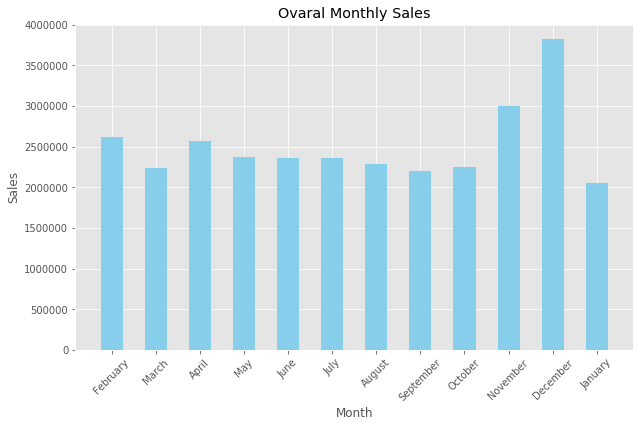

In [45]:
#Provide a monthly and semester view of sales in units and give insights
#1 Monthly view of sales for each years
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.bar(walmart["Month"],walmart["Weekly_Sales"], color='skyblue', width=0.5)
plt.title('Ovaral Monthly Sales')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Sales')

## As we could see from the plot above, holiday month such as NOv, Dec has a increased sale
# THen we look at the yearly sales

Text(0, 0.5, 'Sales')

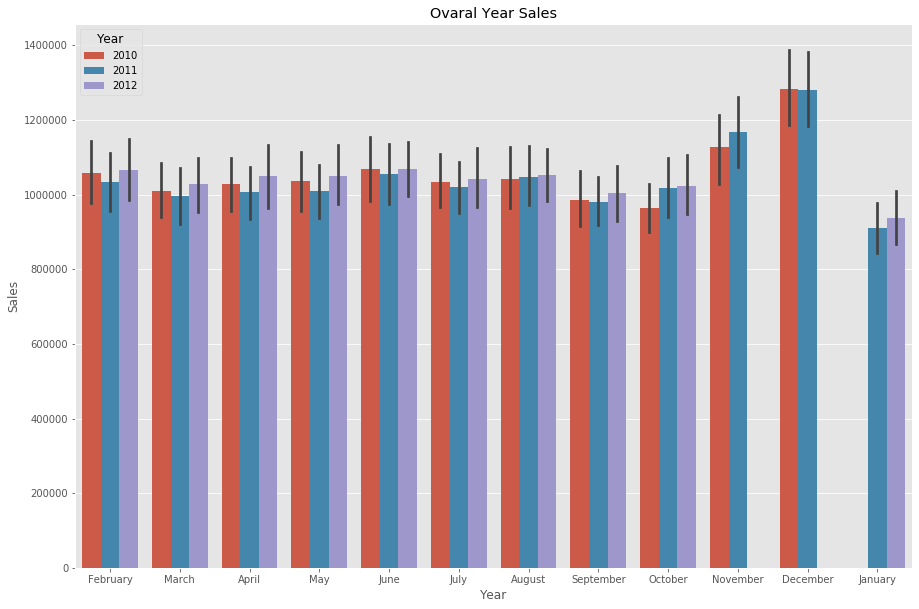

In [52]:
plt.figure(figsize=(15,10))
sns.barplot(x=walmart["Month"],y=walmart["Weekly_Sales"],hue=walmart["Year"])
plt.title('Ovaral Year Sales')
plt.xlabel('Year')
plt.ylabel('Sales')

##Statistical Model

For Store 1 – Build  prediction models to forecast demand

Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

Change dates into days by creating new variable.

Select the model which gives best accuracy.

In [81]:
store1=walmart[walmart.Store==1]
store1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,February,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,February,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,February,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,February,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,March,2010


In [125]:
from sklearn.preprocessing import LabelEncoder
labencoder=LabelEncoder()
store1=store1.copy()
store1['New_Date']=labencoder.fit_transform(store1.Date)
store1['New_Year']=labencoder.fit_transform(store1.Year)
store1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,New_Date,New_Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,February,2010,0,0
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,February,2010,1,0
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,February,2010,2,0
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,February,2010,3,0
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,March,2010,4,0


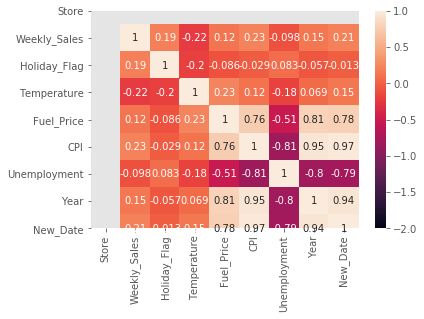

In [90]:
## check heatmap first
sns.heatmap(store1.corr(),annot=True, vmin=-2.0)

In [91]:
store1.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Month           0
Year            0
New_Date        0
dtype: int64

In [106]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [118]:
y=store1['Weekly_Sales']
x=store1[['Temperature','Fuel_Price','CPI','Unemployment','New_Date','New_Year']]

In [119]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3)

In [120]:
model=LinearRegression()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print ('Linear Regression R-square is:',model.score(X_test,Y_test))
print('Mean Absolute Error:',int( mean_absolute_error(Y_test, y_pred)))
print('Mean Squared Error:', int(mean_squared_error(Y_test, y_pred)))

Linear Regression R-square is: 0.011390725226682386
Mean Absolute Error: 113389
Mean Squared Error: 32439041677


In [123]:
# try with lasso model
lasso=Lasso()
model2=lasso.fit(X_train,Y_train)
y_pred2=model2.predict(X_test)
print ("Lasso Regression R-square is :", model2.score(X_test,Y_test))
print('Mean Absolute Error:', int(mean_absolute_error(Y_test, y_pred2)))
print('Mean Squared Error:', int(mean_squared_error(Y_test, y_pred2)))

Lasso Regression R-square is : 0.01138175036708633
Mean Absolute Error: 113388
Mean Squared Error: 32439336168


In [110]:
# Import sklearn 
from sklearn.ensemble import RandomForestRegressor

In [122]:
rf = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)        
rf.fit(X_train,Y_train)
y_pred3=rf.predict(X_test)


print('Mean Absolute Error:', int(mean_absolute_error(Y_test, y_pred3)))
print('Mean Squared Error:', int( mean_squared_error(Y_test, y_pred3)))

Mean Absolute Error: 125475
Mean Squared Error: 43865624478


## as we can see from the three models above, the the regression model with lasso regularization gives best accuracy since Mean Absolute is the smallest